In [1]:
import pandas as pd
import re
import unidecode
import demoji
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from spacy.lang.pt.stop_words import STOP_WORDS
import spacy
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import tokenize
import nltk

%matplotlib inline

nlp = spacy.load("pt")
nlp.Defaults.stop_words |= {"uol","mi","budddhetg","the", "ne", "vou", "ta", "via","ex", "pq", "vc","aa","pra","to", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"}

In [2]:
palavras_irrelevantes = set(stopwords.words('portuguese') + list(punctuation))

In [3]:
data = pd.read_csv("data/tweeterLeo/dataTweeter.csv", sep=";", encoding='utf8')

In [4]:
def cleanText(tweet):
    if "|" in tweet:
        tweet = tweet.split("|")[1]
        
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([0-9])", " ", tweet).split())
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    tweet = ' '.join(re.sub("[\_\|\.\,\"\'\!\?\:\;\$\-\(\)\=]", " ", tweet).split())
    tweet = tweet.lower()
    
    le = list(demoji.findall(tweet))
    for i in le:
        tweet = tweet.replace(i, "")
    
    if tweet.startswith('rt '):
        tweet = tweet.replace("rt ", "")
    
    lNewTweet = []
    for i in tweet.split(" "):
        if i not in palavras_irrelevantes and i not in STOP_WORDS:
            lNewTweet.append(i)
    
    newTweet = " ".join(lNewTweet)
        
    return unidecode.unidecode(newTweet.replace(" rt ", ""))

In [5]:
data["tweet_text_clean"] = data.text.apply(cleanText)

In [32]:
data["tweet_text_clean"].sample(9)

12283    hoje sonhei victoria pedretti passava perrengu...
10127    desafio mostra reacao cachorros historias pala...
7061     medicos atualizam saude trump acompanhe atuali...
11696    gente vive vegeta vitimas cesio relatam dor an...
7474     perdemos fala fotos araquem alcantara afirma g...
1142     gente sente branquitude privilegio gente apren...
12700                         superar alias superei george
1793                                          acha aprendi
688                                                       
Name: tweet_text_clean, dtype: object

In [30]:
# vetorizar = CountVectorizer()
# bag_of_words = vetorizar.fit_transform(data["tweet_text_clean"])

todas_palavras = ' '.join([texto for texto in data["tweet_text_clean"]])

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)

token_frase_2 = []

for i in token_frase:
    a = cleanText(i)
    if a:
        token_frase_2.append(cleanText(i))
# todas_palavras

In [33]:
frequencia = nltk.FreqDist(token_frase_2)
# freqmc = frequencia.most_common(10000)
freqmc = list(frequencia.keys())
# freqmc
# df_frequencia = pd.DataFrame({"Palavras":list(frequencia.keys()), "Frequencia":list(frequencia.values())})

In [26]:
#Test Gemsin bigrams

lista_texto = [texto[0] for texto in freqmc]
# lista_texto
# Build the bigram and trigram models
import gensim
from gensim.models.phrases import Phraser
bigram = gensim.models.Phrases(lista_texto, min_count=5, threshold=100) # higher threshold fewer phrases
trigram = gensim.models.Phrases(bigram[lista_texto], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

[bigram_mod[doc] for doc in lista_texto]

[['amor'],
 ['deus'],
 ['analisa'],
 ['festa'],
 ['vicio'],
 ['onibus'],
 ['ouvindo'],
 ['filhos'],
 ['gravida'],
 ['alo'],
 ['dona'],
 ['senhora'],
 ['assistiu'],
 ['video'],
 ['viu'],
 ['hahahahhaha'],
 ['vamo'],
 ['parar'],
 ['cancelar'],
 ['ihhhhhh'],
 ['alcool'],
 ['planta'],
 ['edu'],
 ['fala'],
 ['arnica'],
 ['juliagualberto'],
 ['estudando'],
 ['fdg'],
 ['mto'],
 ['chique'],
 ['melhor'],
 ['noticiario'],
 ['brasileiro'],
 ['jornal'],
 ['unico'],
 ['ve'],
 ['inteiro'],
 ['matar'],
 ['ahhahaahaha'],
 ['mileena'],
 ['mortal'],
 ['kombat'],
 ['simmm'],
 ['puder'],
 ['leia'],
 ['surreal'],
 ['real'],
 ['historia'],
 ['protagonista'],
 ['filme'],
 ['inventaram'],
 ['coisas'],
 ['ai'],
 ['bode'],
 ['amo'],
 ['tbm'],
 ['ahahah'],
 ['acompanha'],
 ['debates'],
 ['lovecraft'],
 ['country'],
 ['gente'],
 ['falado'],
 ['construcao'],
 ['negro'],
 ['esperava'],
 ['hino'],
 ['hsfcd'],
 ['livro'],
 ['bafo'],
 ['tiroo'],
 ['eeeeeeesse'],
 ['taaaaa'],
 ['ummmm'],
 ['arraaaaaaso'],
 ['leiam'],
 

In [10]:
freqmc = [texto[0] for texto in freqmc]
bigrama = nltk.bigrams(freqmc)

bigrama = map(' '.join, bigrama)
new_bigrama = list(bigrama)
# new_bigrama

In [11]:

trigrama = nltk.trigrams(new_bigrama)
new_trigrama = []
for i in trigrama:
    new_trigrama.append(list(i))
# # new_bigrama
# trigrama = nltk.trigrams(new_bigrama)
# # for i in trigrama:
# #     print(i)
# new_trigrama = map(' '.join, trigrama)
new_trigrama

[['bolsonaro brasil', 'brasil covid', 'covid sp'],
 ['brasil covid', 'covid sp', 'sp paulo'],
 ['covid sp', 'sp paulo', 'paulo trump'],
 ['sp paulo', 'paulo trump', 'trump governo'],
 ['paulo trump', 'trump governo', 'governo gente'],
 ['trump governo', 'governo gente', 'gente presidente'],
 ['governo gente', 'gente presidente', 'presidente dia'],
 ['gente presidente', 'presidente dia', 'dia anos'],
 ['presidente dia', 'dia anos', 'anos pandemia'],
 ['dia anos', 'anos pandemia', 'pandemia pessoas'],
 ['anos pandemia', 'pandemia pessoas', 'pessoas hoje'],
 ['pandemia pessoas', 'pessoas hoje', 'hoje opiniao'],
 ['pessoas hoje', 'hoje opiniao', 'opiniao milhoes'],
 ['hoje opiniao', 'opiniao milhoes', 'milhoes pais'],
 ['opiniao milhoes', 'milhoes pais', 'pais eua'],
 ['milhoes pais', 'pais eua', 'eua debate'],
 ['pais eua', 'eua debate', 'debate mundo'],
 ['eua debate', 'debate mundo', 'mundo cidade'],
 ['debate mundo', 'mundo cidade', 'cidade rio'],
 ['mundo cidade', 'cidade rio', 'rio g

In [12]:
# new_trigrama
# lTrigrama = list(new_trigrama)
# new_trigrama
# frequencia = nltk.FreqDist([" ".join(lTrigrama)])
# frequencia

In [13]:
# new_trigrama
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
l = [["bolsonaro rio", "saude covid"]]
id2word = corpora.Dictionary(new_trigrama)
corpus = [id2word.doc2bow(text) for text in new_trigrama]


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=5):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaMulticore(corpus, id2word=id2word, num_topics=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [15]:
# gerais
import sys
import os
from pathlib import Path
import re
import numpy as np
import pandas as pd
from pprint import pprint
from tqdm import tqdm
import pt_core_news_sm

In [16]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=new_trigrama, start=2, limit=30, step=2)

100%|██████████| 14/14 [00:54<00:00,  3.92s/it]


In [17]:
#plot
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

coherence_values

[0.8004215396806023,
 0.7986376927724038,
 0.8045320717395021,
 0.8028673432931498,
 0.7883337668149835,
 0.8006497181015007,
 0.7879773374284069,
 0.7971530215814632,
 0.8072798572209537,
 0.7969496923213532,
 0.7967061184349619,
 0.7982455318105715,
 0.7916105181504254,
 0.8034983727601318]

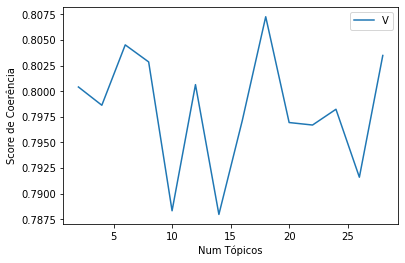

A quantidade de tópicos = 2  tem um valor de coerência de  0.8004
A quantidade de tópicos = 4  tem um valor de coerência de  0.7986
A quantidade de tópicos = 6  tem um valor de coerência de  0.8045
A quantidade de tópicos = 8  tem um valor de coerência de  0.8029
A quantidade de tópicos = 10  tem um valor de coerência de  0.7883
A quantidade de tópicos = 12  tem um valor de coerência de  0.8006
A quantidade de tópicos = 14  tem um valor de coerência de  0.788
A quantidade de tópicos = 16  tem um valor de coerência de  0.7972
A quantidade de tópicos = 18  tem um valor de coerência de  0.8073
A quantidade de tópicos = 20  tem um valor de coerência de  0.7969
A quantidade de tópicos = 22  tem um valor de coerência de  0.7967
A quantidade de tópicos = 24  tem um valor de coerência de  0.7982
A quantidade de tópicos = 26  tem um valor de coerência de  0.7916
A quantidade de tópicos = 28  tem um valor de coerência de  0.8035


In [18]:
# Mostrando visualmente a quantidade de tópicos
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(("Valores de Coerência"), loc='best')
plt.show()# Lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico
for m, cv in zip(x, coherence_values):
    print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))

In [19]:
# Vamos agora construir de fato o modelo LDA
lda_model = LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=3, 
                        random_state=42,
                        chunksize=100,
                        passes=10,
                        per_word_topics=True,
                        alpha = 0.9,
                        eta = 0.3)

In [20]:
# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))


Perplexidade:  -10.143803697031101


In [21]:
# Computar o Score de Coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=new_trigrama, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nScore de Coerência: ', coherence_lda)


Score de Coerência:  0.6234246097777869


In [22]:
# Visualização dos tópicos em clusters
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.196903 -0.013349       1        1  34.413156
1      0.110349 -0.159021       2        1  33.089761
0      0.086554  0.172370       3        1  32.497083, topic_info=                          Term      Freq     Total Category  logprob  loglift
9843                ng faltara  8.000000  8.000000  Default  30.0000  30.0000
9844         faltara impichado  8.000000  8.000000  Default  29.0000  29.0000
9842              sinalizam ng  8.000000  8.000000  Default  28.0000  28.0000
9841        vaticano sinalizam  8.000000  8.000000  Default  27.0000  27.0000
9845       impichado contestem  8.000000  8.000000  Default  26.0000  26.0000
...                        ...       ...       ...      ...      ...      ...
9982      misturam incremental  7.443310  8.219258   Topic3  -7.1773   1.0249
9821  antirracismo reconhecida  7.442438  8.218306   Topic3  -7.1774   1.0249
9986            sabah gregorio  7.439310  8.219693   Topic3  -7.1779   1.0243
9983          incremental angu  7.438460  8.218994   Topic3  -7.1780   1.0242
9987         gregorio duvivier  7.439188  8.219898   Topic3  -7.1779   1.0242

[151 rows x 6 columns], token_table=      Topic      Freq                          Term
term                                               
9471      1  0.859746                   acuerdo con
9919      3  0.851486             advocacia repassa
9840      3  0.851586            africanas vaticano
9208      1  0.937018  almeida/folhapress showmicio
8546      2  0.918691          amada latifundiarios
...     ...       ...                           ...
9945      3  0.851651                   tvh mangues
9847      3  0.851599                vaidade brexit
9841      3  0.851566            vaticano sinalizam
8541      2  0.918267             virado segregacao
9269      1  0.936942                  zorra murcha

[139 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [23]:
# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=5):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaMulticore(corpus, id2word=id2word, num_topics=3)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
    # Colocando parametros na função
    
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=new_trigrama, start=2, limit=4, step=2)

100%|██████████| 1/1 [00:06<00:00,  6.73s/it]


In [24]:
optimal_model = model_list[0]
optimal_model.print_topics(num_topics = 3, num_words = 20)

[(0,
  '0.000*"playstation box" + 0.000*"curtir dirigir" + 0.000*"potencialmente anonima" + 0.000*"desgastes privado" + 0.000*"monitor invasao" + 0.000*"percentuais devedores" + 0.000*"confundir marta" + 0.000*"geram mcb" + 0.000*"objeto nbn" + 0.000*"autodromo falham" + 0.000*"ideologicas criminalizacao" + 0.000*"cro auto" + 0.000*"pessimas vhs" + 0.000*"far four" + 0.000*"desrespeitando areias" + 0.000*"glicerio pueril" + 0.000*"desastres valorizar" + 0.000*"senai africa" + 0.000*"reacende fn" + 0.000*"abordaram ligue"'),
 (1,
  '0.000*"represente xs" + 0.000*"consentimento wyc" + 0.000*"nomeacoes vxa" + 0.000*"eliminatoria latam" + 0.000*"tumulto caprichos" + 0.000*"ouviu finlandia" + 0.000*"blz agradar" + 0.000*"manias indecisao" + 0.000*"associa bento" + 0.000*"procedimentos cobica" + 0.000*"montagem barbara" + 0.000*"cantarem piafhw" + 0.000*"norma morumbi" + 0.000*"jltxwk colunistas" + 0.000*"ponderou wtf" + 0.000*"respondido chiclos" + 0.000*"vendeu desvia" + 0.000*"interrompeu

In [25]:
# Encontrar qual o principal tópico em cada tweet

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=new_trigrama):
    # Output
    sent_topics_df = pd.DataFrame()# Seleciona o principal tópico de cada tweet
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Calcula o principal tópico, o percentual de contribuição e as palavras chaves de cada tweet
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => mostra o principal tópico
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Principal_Topico', 'Perc_Contributicao', 'Palavras_Chave']
    # Inclui o texto original no final do DataFrame
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

# roda a função de calcular os principais tópicos de cada tweet

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=new_trigrama)
# Formata o DataFrame

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Index_DF_Original', 'Principal_Topico', 'Perc_Contrib_Topico', 'Palavras_Chave', 'Tweets']

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Principal_Topico')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contributicao'], ascending=[0]).head(1)], 
                                            axis=0)
    # Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
# Format
sent_topics_sorteddf_mallet.columns = ['Topico', "Topico_Perc_Contrib", "Palavras_Chave", "Tweet"]
# Show
sent_topics_sorteddf_mallet

,Topico,Topico_Perc_Contrib,Palavras_Chave,Tweet
0,0.0,0.8327,"playstation box, curtir dirigir, potencialment...","[onica abordaram, abordaram ligue, ligue aprpc..."
1,1.0,0.8327,"represente xs, consentimento wyc, nomeacoes vx...","[deusa escondeu, escondeu escolinha, escolinha..."
2,2.0,0.8327,"narrando ass, dilemma byung, ressalta unifica,...","[esperados acumulado, acumulado anistia, anist..."


In [26]:
# Numero de tweets por topico
topic_counts = df_topic_sents_keywords['Principal_Topico'].value_counts()# Porcentagem de tweets por tópico
topic_contribution = round(topic_counts/topic_counts.sum(), 4)# Número do tópico e suas palavras chave
topic_num_keywords = df_topic_sents_keywords[['Principal_Topico', 'Palavras_Chave']]# Concatena as colunas
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)# Renomeia as colunas
df_dominant_topics.columns = ['Principal_Topico', 'Palavras_Chave', 'Qtd_Tweets', 'Perc_Tweets']# Mostra o DataFrame
df_dominant_topics

,Principal_Topico,Palavras_Chave,Qtd_Tweets,Perc_Tweets
0.0,1.0,"represente xs, consentimento wyc, nomeacoes vx...",3343.0,0.3344
1.0,1.0,"represente xs, consentimento wyc, nomeacoes vx...",3303.0,0.3304
2.0,0.0,"playstation box, curtir dirigir, potencialment...",3351.0,0.3352
3.0,0.0,"playstation box, curtir dirigir, potencialment...",NaN,NaN
4.0,1.0,"represente xs, consentimento wyc, nomeacoes vx...",NaN,NaN
...,...,...,...,...
9992.0,0.0,"playstation box, curtir dirigir, potencialment...",NaN,NaN
9993.0,0.0,"playstation box, curtir dirigir, potencialment...",NaN,NaN
9994.0,0.0,"playstation box, curtir dirigir, potencialment...",NaN,NaN
9995.0,0.0,"playstation box, curtir dirigir, potencialment...",NaN,NaN


In [27]:
# Criando stopwords em português utilizando a biblioteca spacy
import pt_core_news_sm
nlp = pt_core_news_sm.load()
pt_stopwords = sorted([token.text for token in nlp.vocab if token.is_stop])
list_exclude = ['obrigado', 'bom', 'mal', 'nenhuma', 'maior',
             'bem', 'não', 'máximo', 'boa', 'mais',
               'bastante', 'certamente', 'certeza', 'contra',
                'quarentena', 'coronavírus', 'presidente', 'impeachment', 'demitido', 'demitida']
for word in list_exclude:
    nlp.vocab[word].is_stop = False
list_include = set(['o', 'a', 'tá', 'ta', 'ser', 'pro', 'to', 'tô', 'vc', 'você', 'voce', 'pra',
                    'pq', 'é', 'vou', 'que','tão', 'gt', 'de', 'da', 'do', 'em', 'uma', 'lá',
                    'já', 'no', 'para', 'na', 'com', 'um', 'minha', 'se', 'isso', 'por', 'vou',
                    'os', 'isso', 'como', 'mesmo', 'tenho', 'aqui', 'ele', 'ela', 'quem', 'fazer',
                    'eu', 'só', 'ai', 'mais', 'só', 'querer', 'https', 'ter', 'estar', 'ficar',
                    'dos', 'das', 'vcs', 'tem', 'as', 'mas','ao'
                    'tava', 'nao', 'sao', 'ja', 'so', 'nossa',
                    'nosso', 'estao', 'tco', 'me', 'dia', 'te', 'ver', 'sera', 'porra', 'fez', 'ne',
                    'kkk','kkkkkk', 'puta', 'kkkkkkkk', 'hj', 'afff', 'gbr', 'meu', 'cara', 'guri', 'cmg',
                    'ctg', 'agr', 'pqp', 'vdd', 'eh', 'va', 'obg',
                    'corona','virus','coronavirus','covid','covid19','19'
                   'nem', 'numa', 'num', 'nuns', 'ces', 'voces', 'oce', 'oces', 'kkkk', 'vao', 'via',
                    'hj', 'hoje', 'tudo', 'todo', 'toda',
                    'vir', 'bem','ao','sem','ou','vai', 'dizer', 'entao', 'dizer', 'entao',
                    'tao', 'tu', 'mim', 'mano', 'oq', 'pos', 'dm', 'dps',
                    'coronavirusoutbreak', 'coronavirusPandemic', 'dar', 'vairus',
                    'ainda', 'assim']
                  )
for w in list_include:
    nlp.vocab[w].is_stop = True
stop_words = sorted([token.text for token in nlp.vocab if token.is_stop])

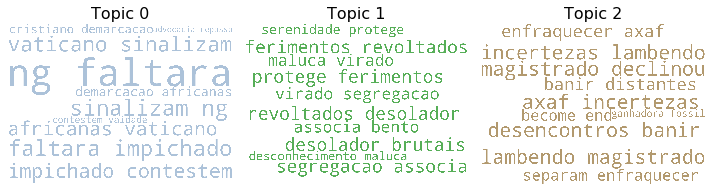

In [28]:
# Cria wordclouds
cols = [color for name, color in mcolors.XKCD_COLORS.items()]
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=600)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()